# Import Libraries

In [55]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load COCO Annotations File

In [57]:
# Set file path and initiate COCO object
anns_path = '../data/external/coco/annotations/instances_val2017.json'
coco = COCO(anns_path)

# Load all images, annotations, and categories
img_ids = coco.getImgIds()
ann_ids = coco.getAnnIds()
cat_ids = coco.getCatIds() # categories (cats) = classes

imgs = coco.loadImgs(img_ids)
anns = coco.loadAnns(ann_ids)
cats = coco.loadCats(cat_ids)

loading annotations into memory...
Done (t=1.16s)
creating index...
index created!


# Summary
Number of images, annotations, and classes

In [47]:
print('Number of images: ', len(img_ids))
print('Number of annotations: ', len(ann_ids))
print('Number of classes: ', len(cat_ids))

Number of images:  5000
Number of annotations:  36781
Number of classes:  80


List of classes

In [48]:
cat_names = [cat['name'] for cat in cats]
cat_names

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'dining table',
 'toilet',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

# Class Analysis
Distribution of class samples

Minimum number of images per class:  8
Max number of images per class 2693
Average number of images per class:  182


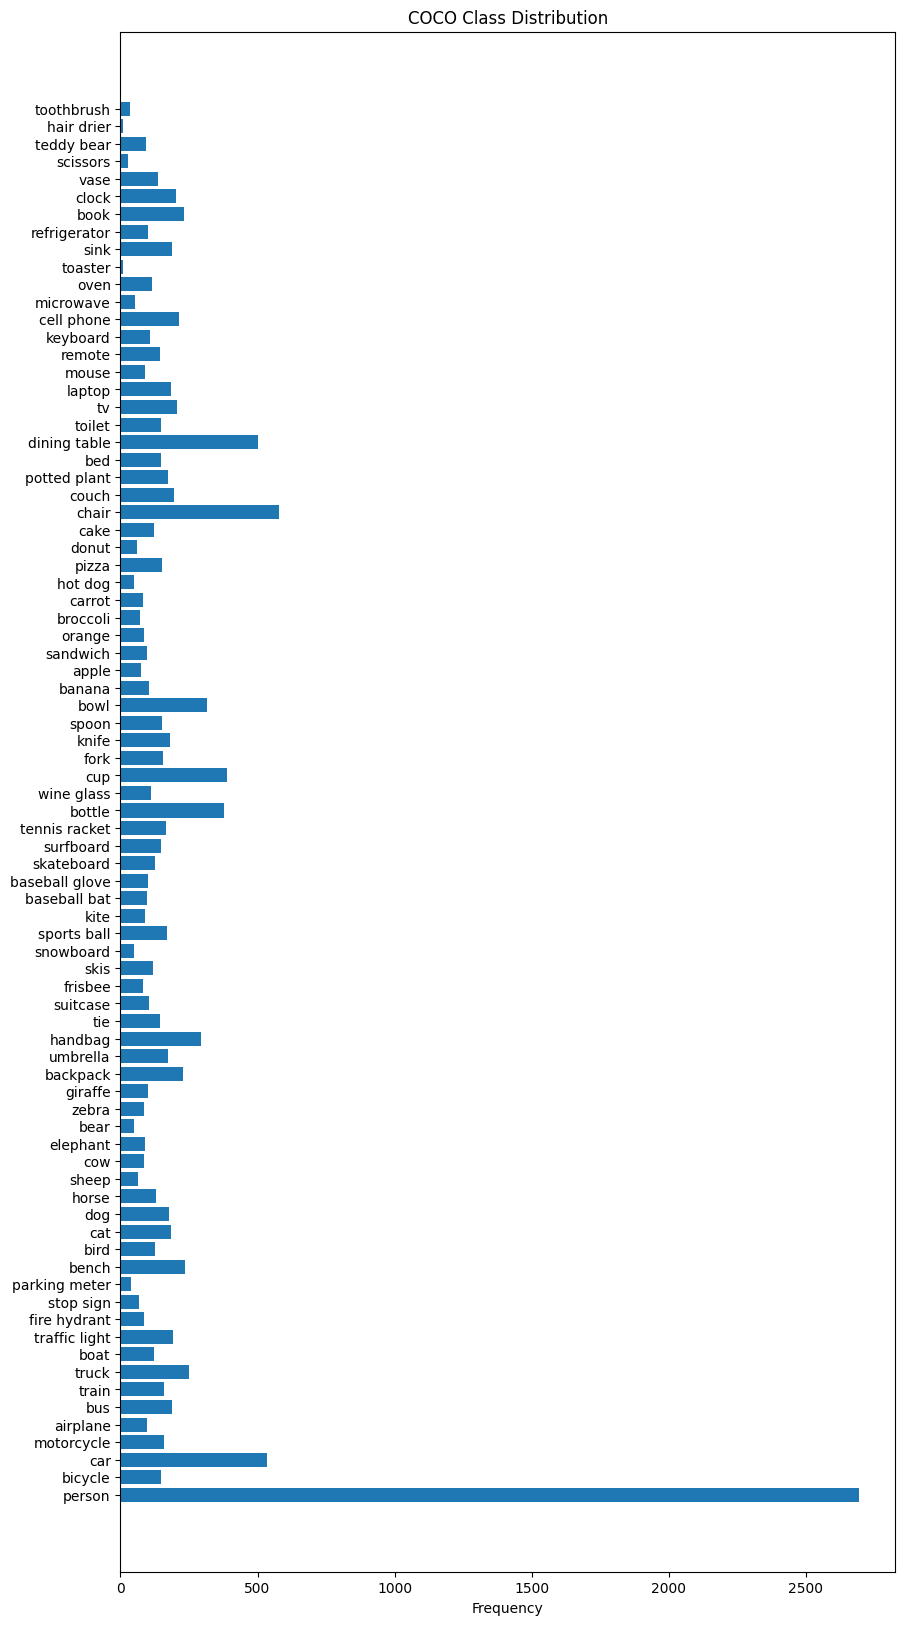

In [73]:
# Count the number of images per class
cat_img_counts = {}
for cat in cats:
    cat_id = cat['id']
    cat_img_ids = coco.getImgIds(catIds=[cat_id])
    cat_img_counts[cat['name']] = len(cat_img_ids)

cat_img_counts_list = list(cat_img_counts.values())

# Descriptive stats
print('Minimum number of images per class: ', min(cat_img_counts_list))
print('Max number of images per class: ', max(cat_img_counts_list))
print('Average number of images per class: ', int(sum(cat_img_counts_list) / len(cat_img_counts_list)))

# Plot the distribution
plt.figure(figsize=(10, 20))
plt.barh(list(cat_img_counts.keys()), list(cat_img_counts.values()))
plt.xlabel('Frequency')
plt.title('COCO Class Distribution')
plt.show()

# Image Analysis

Distribution of image sizes

             width       height
count  5000.000000  5000.000000
mean    573.754800   483.543000
std      94.003704    98.765315
min     200.000000   145.000000
25%     500.000000   426.000000
50%     640.000000   480.000000
75%     640.000000   517.750000
max     640.000000   640.000000


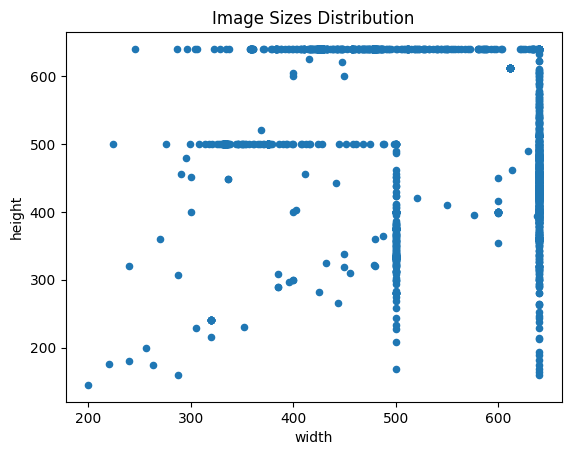

In [76]:
df_imgs = pd.DataFrame(imgs)
img_sizes = df_imgs[['width', 'height']]

print(img_sizes.describe())

img_sizes.plot.scatter(x='width', y='height')
plt.title('Image Sizes Distribution')
plt.show()

# Annotations Analysis

Distribution of annotations per image

Number of images with at least one annotation: 4952
Number of images with no annotations: 48
Minimum number of annotations per image: 0
Maximum number of annotations per image: 63
Average number of annotations per image: 7


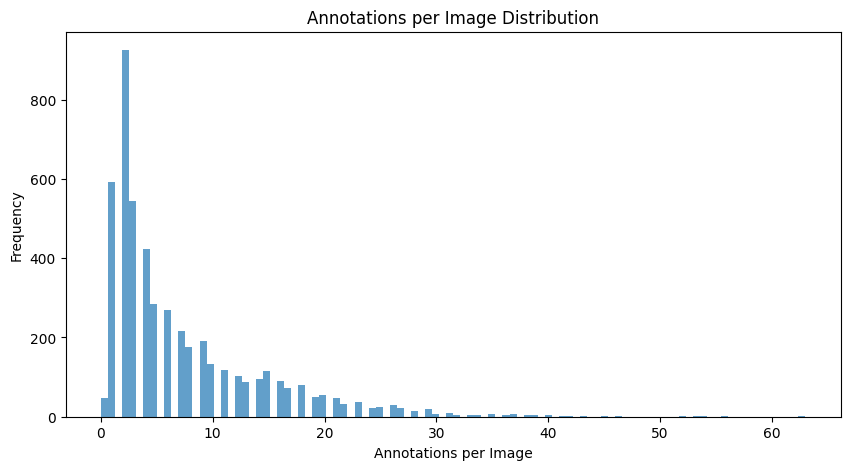

In [53]:
# Count the number of annotations per image
anns_per_img = []
for img_id in img_ids:
    ann_ids = coco.getAnnIds(imgIds=[img_id])
    anns_per_img.append(len(ann_ids))

# Descriptive stats
print('Number of images with at least one annotation:', len([ann_count for ann_count in anns_per_img if ann_count > 0]))
print('Number of images with no annotations:', len([ann_count for ann_count in anns_per_img if ann_count == 0]))
print('Minimum number of annotations per image:', min(anns_per_img))
print('Maximum number of annotations per image:', max(anns_per_img))
print('Average number of annotations per image:', int(sum(anns_per_img) / len(anns_per_img)))

# Plot the distribution
plt.figure(figsize=(10, 5))
plt.hist(anns_per_img, bins=100, alpha=0.7)
plt.xlabel('Annotations per Image')
plt.ylabel('Frequency')
plt.title('Annotations per Image Distribution')
plt.show()

Distribution of bounding box **area** and **aspect ratio**

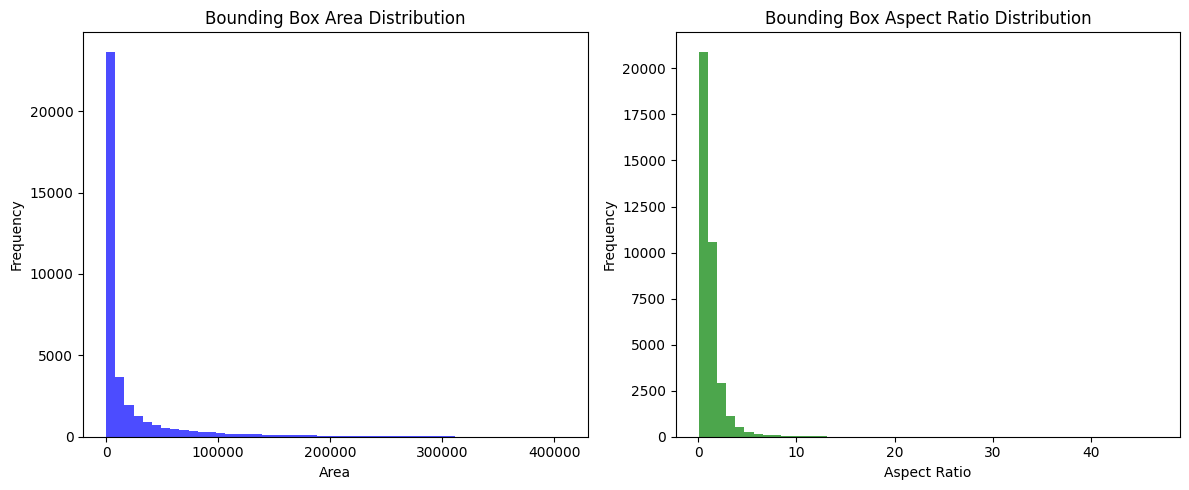

In [74]:
# Calculate areas and aspect ratios of bounding boxes
areas = []
aspect_ratios = []

for ann in anns:
    bbox = ann['bbox']
    width, height = bbox[2], bbox[3]
    areas.append(width * height)
    aspect_ratios.append(width / height)
    
# Plot the distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(areas, bins=50, color='blue', alpha=0.7)
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.title('Bounding Box Area Distribution')

plt.subplot(1, 2, 2)
plt.hist(aspect_ratios, bins=50, color='green', alpha=0.7)
plt.xlabel('Aspect Ratio')
plt.ylabel('Frequency')
plt.title('Bounding Box Aspect Ratio Distribution')

plt.tight_layout()
plt.show()